In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

import pandas as pd
import numpy as np
import os

%matplotlib inline

In [2]:
NOTEBOOK_DIR = os.getcwd()
BASE_DIR = os.path.dirname(NOTEBOOK_DIR)
DATA_DIR = os.path.join(BASE_DIR, "data")
DATA_DIR_PATH = os.path.join(DATA_DIR, "init_price_cleaned.csv")
DATA_ZIP_DIR_PATH = os.path.join(DATA_DIR, "init_price_cleaned.csv.zip")

In [50]:
if not os.path.exists(DATA_DIR_PATH):
    !unzip "${DATA_ZIP_DIR_PATH}"

data_car = pd.read_csv(DATA_DIR_PATH)

data_car.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,version,spuissance_fiscale,portes,options,couleur,starting_price,bonus_malus,puiss_scrap,portes_scrap,Price/Starting Price
0,11220.0,peugeot,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,1.6 hdi fap 92ch business 5p,4,5.0,banquette arrière 3 places;volant cuir;cache b...,blanc banquise,25050.0,0.0,5.0,5,0
1,2830.0,ford,ka,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,1.3 70 fun,5,3.0,direction assistée;jantes alu;rétroviseurs éle...,jaune,12150.0,150.0,5.0,5,0
2,12925.0,fiat,tipo,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,ii sw 1.4 95 pop,5,5.0,Volant alu & cuir;Bluetooth inclut musique en ...,blanc verni,14990.0,740.0,5.0,4,0
3,27956.0,bmw,x3,2012,95623.0 km,Diesel,automatique,14/03/2018 à 4h24,(f25) xdrive35d 313 sport design bva8,20,5.0,vitrage calorifuge;triangle de presignalisatio...,saphirschwarz metal,NaN,NaN,NaN,NaN,0
4,16888.0,audi,a3,2013,49018.0 km,Diesel,mécanique,16/04/2018 à 21h35,ii (2) sportback 2.0 tdi 140 7cv ambition luxe...,7,5.0,"""anti démarrage;radar de recul;prises audio au...",gris clair metal,45070.0,740.0,10.0,5,0


## Bonus Malus vs Price

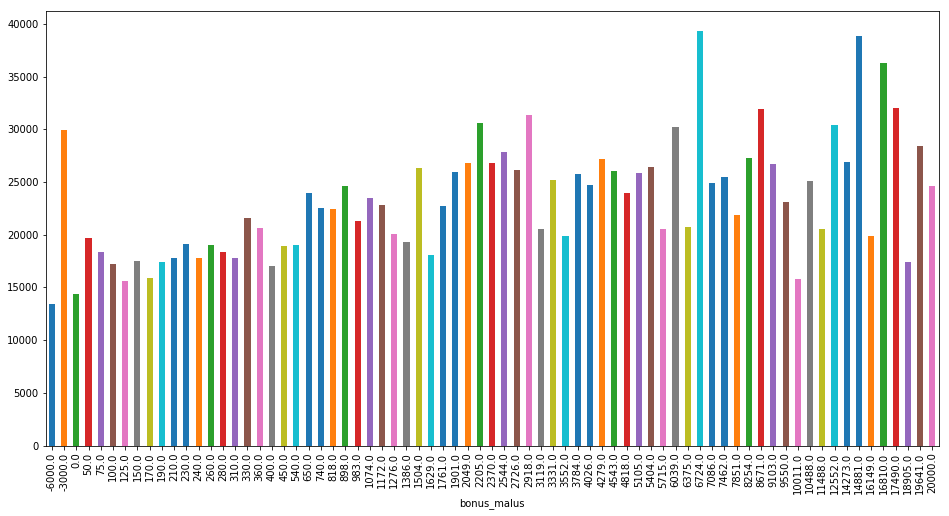

In [31]:
data_car.groupby("bonus_malus")["Price"].agg("mean").plot(kind="bar", figsize=(16,8))

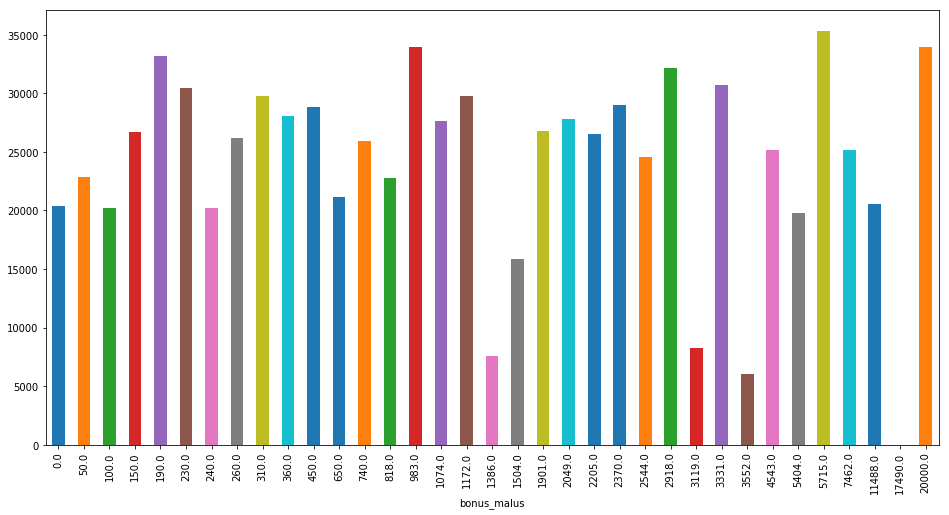

In [44]:
# voiture audi
data_car[data_car["Make"] == 'audi']\
    .groupby("bonus_malus")["Price"]\
    .agg("mean")\
    .plot(kind="bar", figsize=(16,8))

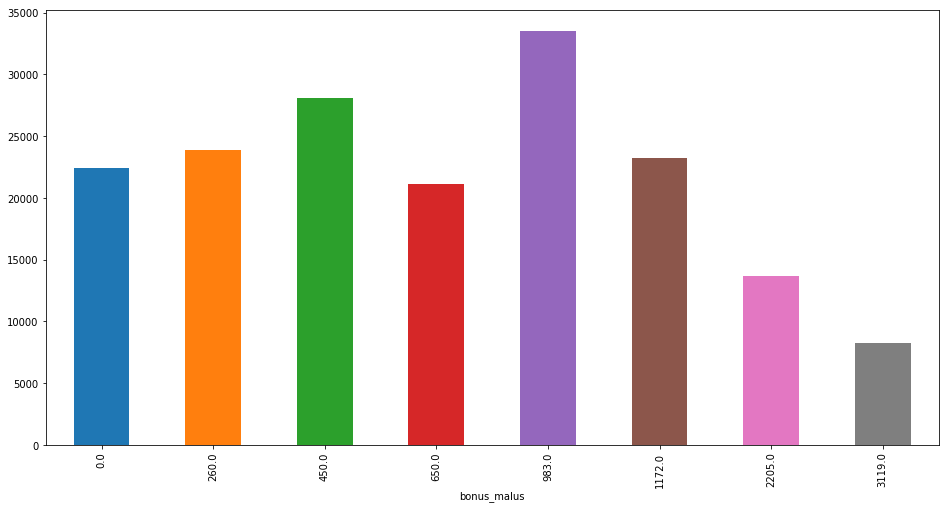

In [43]:
# Voiture audi et model a4
data_car[(data_car["Make"] == 'audi') & (data_car["Model"] == 'a4')]\
    .groupby("bonus_malus")["Price"]\
    .agg("mean")\
    .plot(kind="bar", figsize=(16,8))

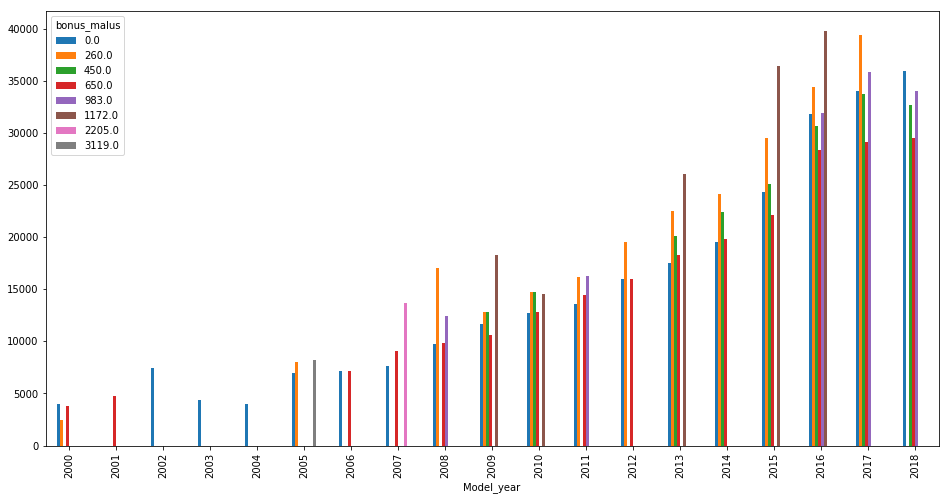

In [57]:
data_car[(data_car["Make"] == 'audi') & (data_car["Model"] == 'a4')]\
    .groupby(["Model_year", "bonus_malus"])\
    .agg("mean")["Price"].unstack().plot(kind='bar', figsize=(16,8))

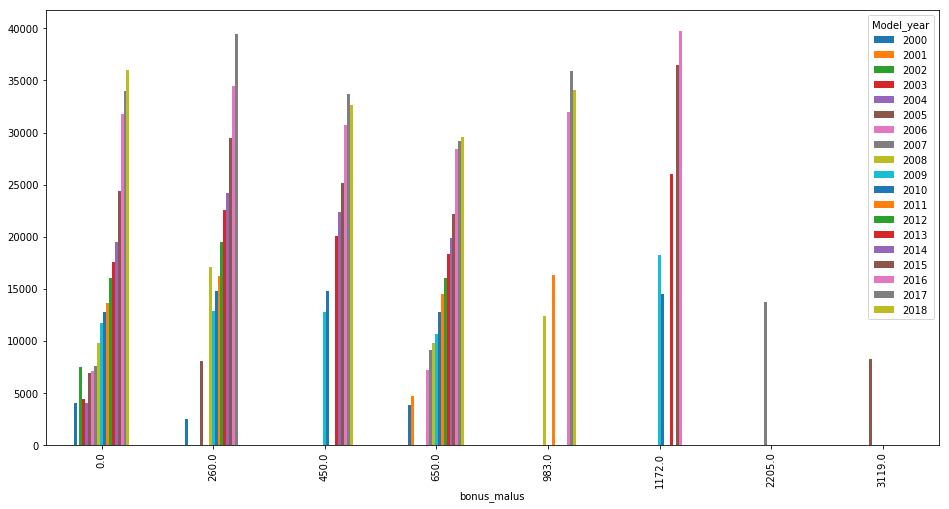

In [56]:
data_car[(data_car["Make"] == 'audi') & (data_car["Model"] == 'a4')]\
    .groupby(["bonus_malus", "Model_year"])["Price"]\
    .agg("mean").unstack().plot(kind='bar',figsize=(16,8))

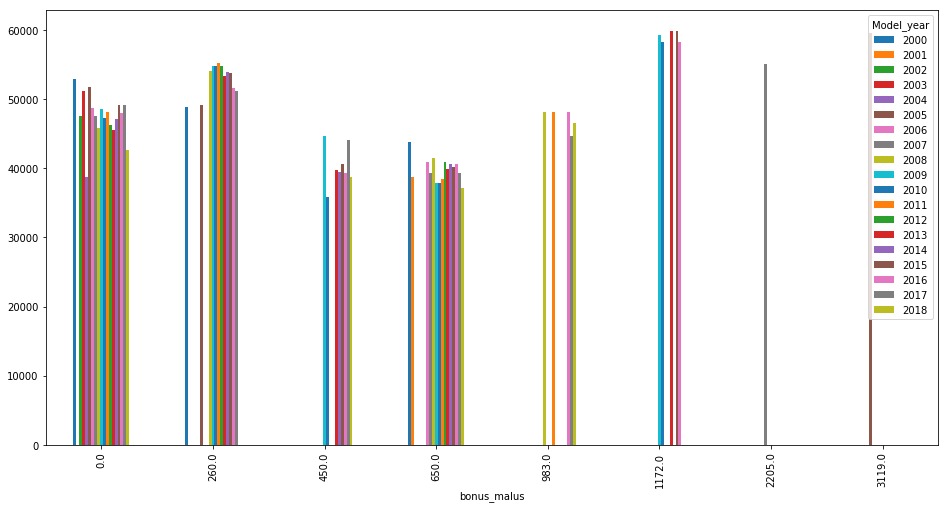

In [55]:
data_car[(data_car["Make"] == 'audi') & (data_car["Model"] == 'a4')]\
    .groupby(["bonus_malus", "Model_year"])["starting_price"]\
    .agg("mean").unstack().plot(kind='bar',figsize=(16,8))

In [19]:
data_car["bonus_malus"].unique()

array([    0.,   150.,   740.,    nan,   400.,   170.,   330.,   280.,
         540.,   230.,   100.,   260.,   450.,   360.,   310.,   983.,
         240.,  1761.,   125.,  1074.,  2205.,   650.,   818.,  3119.,
          50.,  2726.,   210.,   190., 19641.,  1172.,  2370., -6000.,
          75., 20000.,   898.,  4543.,  2049.,  1901.,  3331., 16149.,
        1276.,  1504.,  1629., 10011.,  5715.,  8671.,  2544.,  4279.,
        7462., 10488.,  4818.,  4026.,  1386.,  6039.,  6375.,  7086.,
        2918.,  3552.,  9103.,  3784., 11488., 14881.,  9550., 18905.,
       17490.,  5105.,  8254., 12552.,  5404.,  7851., 14273., -3000.,
       16810.,  6724.])

## Spuisance + portes vs scrapping

In [4]:
data_car["portes"].isnull().sum()

1106

In [52]:
# changer data type: str + float mixture => int => str
data_car["portes"][data_car["portes"].notnull()] = data_car["portes"][data_car["portes"].notnull()].astype(int, inplace=True).astype(str, inplace=True)

In [53]:
data_car["portes"] = np.where(
    ((data_car["portes"].isnull()) | (data_car["portes"] == '0') | (data_car["portes"] == '6')) \
         & (data_car["portes_scrap"].notnull()),
    data_car["portes_scrap"],
    data_car["portes"]
)

In [54]:
data_car["portes"].isnull().sum()

480

In [9]:
# missing value sur le champ de port
1106 - 628

478

In [10]:
data_car["portes"].unique()

array(['5', '3', '2', '4', nan, 'Monospace', 'Tout-Terrain', '0',
       'Fourgonnette', 'Coupé', 'Fourgon', '6', 'Combiné', 'Cabriolet',
       'Break'], dtype=object)

## Init Price vs Price

In [11]:
data_car["starting_price"].isnull().sum()

38475

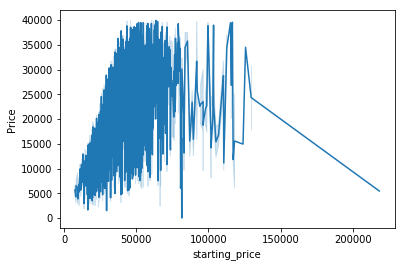

In [75]:
sns.lineplot(x ='starting_price', y ='Price', data = data_car)

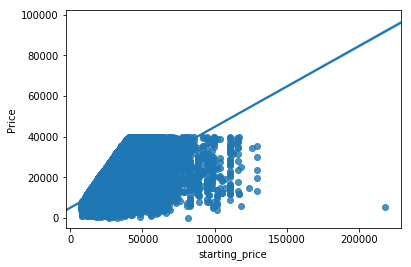

In [76]:
sns.regplot(x ='starting_price', y ='Price', data = data_car)

In [10]:
# data_car.groupby(["Make", "Model", "Model_year"])["Price", "starting_price"].agg("mean")
# data_car.groupby(["Make", "Model", "Model_year"])["starting_price"].transform(lambda x: x.fillna(x.mean()))
# data_car.groupby(["Make"])["starting_price"].transform(lambda x: x.fillna(x.mean())).isnull().sum()

In [12]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.preprocessing import Imputer
import re
from sklearn.linear_model import LinearRegression

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [96]:
class DateOnlineEncoder(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        d_t = [datetime.strptime(c[0], "%d/%m/%Y à %Hh%M") for c in X.values]
        return np.array(d_t)
    
class AgeFeature(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        #d_t = [datetime.strptime(c, "%d/%m/%Y à %Hh%M") for c in X.iloc[:,0].values]
        age = [np.abs(a.year - b) for (a, b) in zip(X.iloc[:,0].values, X.iloc[:,1].values)]
        return np.array(age)

class MileageClean(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        #assert isinstance(X, pd.DataFrame)
        return np.array([float(m[0].rstrip('km').strip()) for m in np.array(X.values).reshape(-1, 1)]).reshape(-1,1)
    
class DesciptionClean(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        def parser():
            regex_pattern = r"modele:\s*(?P<modele>.*?(?=,)),\sversion:\s*(?P<version>.*?(?=,)),\spuissance_fiscale:\s*(?P<puissance_fiscale>.*?(?=,)),\sportes:\s*(?P<portes>.*?(?=,)),\soptions:\s*(?P<Descriptions>.*?(?=,)),\scouleur:\s(?P<couleur>.*$)"
            regex_cyclindre = "\d+[\.,]\d+"
            regex_cv = "\s+\d{1,3}\s?"
            #version = []
            #puissance_fiscale = []
            #portes = []
            #options = []
            #couleur = []
            for i in range(X.shape[0]):
                match = re.search(regex_pattern, X.values[i][0])
                version = match.group(2)
                if str(version) == 'ii allurehdifap2.0150cv':
                    version = 'ii allurehdifap 2.0 150cv'
                version = re.sub("\d+[\.,]\d+km", "", version)
                version = re.sub("(159.226|76.538|87.480|71.000)", "", version)
                cl = re.findall(regex_cyclindre, version)
                version = re.sub(regex_cyclindre, "", version)
                version = re.sub("\d+p", "", version)
                cv = re.findall(regex_cv, version)
                if len(cl) == 0:
                    cl = np.nan
                else:
                    cl = float(cl[0].strip().replace(",", "."))
                if len(cv) == 0:
                    cv = np.nan
                else:
                    cv = int(float(cv[0].strip()))
                #version.append(match.group(2))
                #puissance_fiscale.append(match.group(3))
                #portes.append(match.group(4))
                #options.append(match.group(5))
                #couleur.append(match.group(6))
                yield [cl, cv, pd.to_numeric(match.group(3)), pd.to_numeric(match.group(4)), str(match.group(6)).lower()]

        return pd.DataFrame.from_records(list(parser()))

    
class LinearRegressorImputer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        #X.iloc[:,0].values, X.iloc[:,1].values
        assert isinstance(X, pd.DataFrame)
        missing_data_price = X.loc[X.iloc[:,0].isnull().values, "Price"].values.reshape(-1,1)
        missing_data_index = [i[0] for i in X.loc[X.iloc[:,0].isnull().values, "Price"].index.values.reshape(-1,1)]
        dt = X.loc[X.iloc[:,0].notnull(), :]
        m = LinearRegression()
        m.fit(X = dt.iloc[:,1].values.reshape(-1,1), y = dt.iloc[:, 0].values.reshape(-1,1))
        missing_data_pred = m.predict(missing_data_price)
        
        X.iloc[missing_data_index, 0] = missing_data_pred.reshape(1, -1)[0]
        return X.iloc[:,0].values

class CategoryType(TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #assert isinstance(X, pd.DataFrame)
        return X.astype("object")

class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])

In [56]:
preprocessing_mapper = DataFrameMapper([
    (["Online"], DateOnlineEncoder()),
    #(["Online", "Model_year"], AgeFeature(), {'alias': 'age'}),
    ("Make", [CategoricalImputer(), CategoryType()]),
    ("Model", [CategoryType(), CategoricalImputer()]),
    ("Model_year", CategoricalImputer()),
    ("Mileage", [MileageClean(), Imputer(strategy='mean')]),
    ("Fuel", [CategoryType(), CategoricalImputer()]),
    ("Gearbox", [CategoryType(), CategoricalImputer()]),
    #(["Description"], DesciptionClean()),
], input_df=True, df_out=True, default=None)

data_preprocessing = preprocessing_mapper.fit_transform(data_car)
data_preprocessing.head()

,Online,Make,Model,Model_year,Mileage,Fuel,Gearbox,Price,version,spuissance_fiscale,portes,options,couleur,starting_price,bonus_malus,puiss_scrap,portes_scrap,Price/Starting Price
0,2018-07-06 03:47:00,peugeot,308,2014,94341.0,Diesel,mécanique,11220.0,1.6 hdi fap 92ch business 5p,4,5,banquette arrière 3 places;volant cuir;cache b...,blanc banquise,25050.0,0.0,5.0,5,0
1,2018-07-09 14:12:00,ford,ka,2007,92282.0,Essence,mécanique,2830.0,1.3 70 fun,5,3,direction assistée;jantes alu;rétroviseurs éle...,jaune,12150.0,150.0,5.0,5,0
2,2018-05-19 03:52:00,fiat,tipo,2018,10.0,Essence,mécanique,12925.0,ii sw 1.4 95 pop,5,5,Volant alu & cuir;Bluetooth inclut musique en ...,blanc verni,14990.0,740.0,5.0,4,0
3,2018-03-14 04:24:00,bmw,x3,2012,95623.0,Diesel,automatique,27956.0,(f25) xdrive35d 313 sport design bva8,20,5,vitrage calorifuge;triangle de presignalisatio...,saphirschwarz metal,NaN,NaN,NaN,NaN,0
4,2018-04-16 21:35:00,audi,a3,2013,49018.0,Diesel,mécanique,16888.0,ii (2) sportback 2.0 tdi 140 7cv ambition luxe...,7,5,"""anti démarrage;radar de recul;prises audio au...",gris clair metal,45070.0,740.0,10.0,5,0


In [57]:
features_mapper = DataFrameMapper([
    (["Online", "Model_year"], AgeFeature(), {'alias': 'age'}),
    #(["Make"], CategoryType()),
    #(["Model"], CategoryType()),
    (["Model_year"], None),
    #(["Mileage"], MileageClean()),
    #(["Fuel"], CategoryType()),
    #(["Gearbox"], CategoryType()),
    # (["Description"], DesciptionClean()),
], input_df=True, df_out=True, default=None)

data_extra_features = features_mapper.fit_transform(data_preprocessing)
data_extra_features.head()

,age,Model_year,Make,Model,Mileage,Fuel,Gearbox,Price,version,spuissance_fiscale,portes,options,couleur,starting_price,bonus_malus,puiss_scrap,portes_scrap,Price/Starting Price
0,4,2014,peugeot,308,94341.0,Diesel,mécanique,11220.0,1.6 hdi fap 92ch business 5p,4,5,banquette arrière 3 places;volant cuir;cache b...,blanc banquise,25050.0,0.0,5.0,5,0
1,11,2007,ford,ka,92282.0,Essence,mécanique,2830.0,1.3 70 fun,5,3,direction assistée;jantes alu;rétroviseurs éle...,jaune,12150.0,150.0,5.0,5,0
2,0,2018,fiat,tipo,10.0,Essence,mécanique,12925.0,ii sw 1.4 95 pop,5,5,Volant alu & cuir;Bluetooth inclut musique en ...,blanc verni,14990.0,740.0,5.0,4,0
3,6,2012,bmw,x3,95623.0,Diesel,automatique,27956.0,(f25) xdrive35d 313 sport design bva8,20,5,vitrage calorifuge;triangle de presignalisatio...,saphirschwarz metal,NaN,NaN,NaN,NaN,0
4,5,2013,audi,a3,49018.0,Diesel,mécanique,16888.0,ii (2) sportback 2.0 tdi 140 7cv ambition luxe...,7,5,"""anti démarrage;radar de recul;prises audio au...",gris clair metal,45070.0,740.0,10.0,5,0


In [58]:
def cylindre_cv_extra(df):
    regex_cyclindre = "\d+[\.,]\d+"
    regex_cv = "\s+\d{1,3}\s?"
    cylindre = []
    cheveaux = []
    for i in range(df.version.shape[0]):
        if df.version[i] == 'ii allurehdifap2.0150cv':
            df.version[i] = 'ii allurehdifap 2.0 150cv'
        #print(i, data_car_preprocessed.version[i])
        text = df.version[i]
        # supprimer les nombres du kilogmetrage dans le text
        text = re.sub("\d+[\.,]\d+km", "", text)
        text = re.sub("(159.226|76.538|87.480|71.000)", "", text)
        cl = re.findall(regex_cyclindre, text)
        text = re.sub(regex_cyclindre, "", text)
        # supprimer les nombres du porte dans text
        text = re.sub("\d+p", "", text)
        cv = re.findall(regex_cv, text)
        if len(cl) == 0:
            #print("None")
            cylindre.append(np.nan)
        else:
            #print("More 2")
            cylindre.append(float(cl[0].strip().replace(",", ".")))

        if len(cv) == 0:
            cheveaux.append(np.nan)
        else:
            cheveaux.append(int(cv[0].strip()))
        #cylindre.append(re.findall(regex, data_car_preprocessed.version[i])[0])
    # print(len(cv), len(cylindre), df.shape)
    df["cylindre"] = cylindre
    df["cv"] = cheveaux
    return df

In [59]:
data_extra_features = cylindre_cv_extra(data_extra_features)

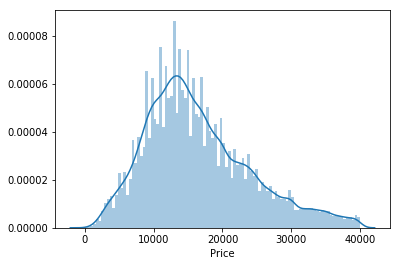

In [18]:
sns.distplot(data_extra_features.Price, bins=100)

In [98]:
imputer_extra_mapper = DataFrameMapper([
    ("portes", CategoricalImputer()),
    ("couleur", CategoricalImputer()),
    (["cylindre", "Price"], LinearRegressorImputer(), {'alias': 'cylindre'}),
    (["cv", "Price"], LinearRegressorImputer(), {'alias': 'cv'}),
    ("Price", None)
], input_df=True, df_out=True, default=None)

data_imp = imputer_extra_mapper.fit_transform(data_extra_features)
data_imp.head()

,portes,couleur,cylindre,cv,Price,age,Model_year,Make,Model,Mileage,Fuel,Gearbox,version,spuissance_fiscale,options,starting_price,bonus_malus,puiss_scrap,portes_scrap,Price/Starting Price
0,5,blanc banquise,1.6000,92.0,11220.0,4,2014,peugeot,308,94341.0,Diesel,mécanique,1.6 hdi fap 92ch business 5p,4,banquette arrière 3 places;volant cuir;cache b...,25050.0,0.0,5.0,5,0
1,3,jaune,1.3000,70.0,2830.0,11,2007,ford,ka,92282.0,Essence,mécanique,1.3 70 fun,5,direction assistée;jantes alu;rétroviseurs éle...,12150.0,150.0,5.0,5,0
2,5,blanc verni,1.4000,95.0,12925.0,0,2018,fiat,tipo,10.0,Essence,mécanique,ii sw 1.4 95 pop,5,Volant alu & cuir;Bluetooth inclut musique en ...,14990.0,740.0,5.0,4,0
3,5,saphirschwarz metal,1.7319,313.0,27956.0,6,2012,bmw,x3,95623.0,Diesel,automatique,(f25) xdrive35d 313 sport design bva8,20,vitrage calorifuge;triangle de presignalisatio...,NaN,NaN,NaN,NaN,0
4,5,gris clair metal,2.0000,140.0,16888.0,5,2013,audi,a3,49018.0,Diesel,mécanique,ii (2) sportback 2.0 tdi 140 7cv ambition luxe...,7,"""anti démarrage;radar de recul;prises audio au...",45070.0,740.0,10.0,5,0


In [99]:
data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153506 entries, 0 to 153505
Data columns (total 20 columns):
portes                  153506 non-null object
couleur                 153506 non-null object
cylindre                153506 non-null float64
cv                      153506 non-null float64
Price                   153506 non-null float64
age                     153506 non-null int64
Model_year              153506 non-null int64
Make                    153506 non-null object
Model                   153506 non-null object
Mileage                 153506 non-null float64
Fuel                    153506 non-null object
Gearbox                 153506 non-null object
version                 153506 non-null object
spuissance_fiscale      153506 non-null int64
options                 149271 non-null object
starting_price          115031 non-null float64
bonus_malus             115031 non-null float64
puiss_scrap             115031 non-null float64
portes_scrap            115031 non-null

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, MultiLabelBinarizer

def categorical_variables(df, categorical_v):
    #df[categorical_v] = df[categorical_v].apply(LabelEncoder().fit_transform)
    df[categorical_v] = df[categorical_v].apply(LabelEncoder().fit_transform)
    return df
cat_features = ["Make", "Model", "Fuel", "Gearbox", "portes", "couleur"]

data = categorical_variables(data_imp, cat_features)

In [100]:
cat_features_mapper = DataFrameMapper([
    ("Make", MultiLabelBinarizer()),
    ("Model", MultiLabelBinarizer()),
    ("Fuel", MultiLabelBinarizer()),
    ("Gearbox", LabelBinarizer()),
    ("portes", MultiLabelBinarizer()),
    ("couleur", MultiLabelBinarizer())
], input_df=True, df_out=True, default=None)

data = cat_features_mapper.fit_transform(data_imp)
data.head()

,Make_,Make_a,Make_b,Make_c,Make_d,Make_e,Make_f,Make_g,Make_h,Make_i,...,Model_year,Mileage,version,spuissance_fiscale,options,starting_price,bonus_malus,puiss_scrap,portes_scrap,Price/Starting Price
0,0,0,0,0,0,1,0,1,0,0,...,2014,94341.0,1.6 hdi fap 92ch business 5p,4,banquette arrière 3 places;volant cuir;cache b...,25050.0,0.0,5.0,5,0
1,0,0,0,0,1,0,1,0,0,0,...,2007,92282.0,1.3 70 fun,5,direction assistée;jantes alu;rétroviseurs éle...,12150.0,150.0,5.0,5,0
2,0,1,0,0,0,0,1,0,0,1,...,2018,10.0,ii sw 1.4 95 pop,5,Volant alu & cuir;Bluetooth inclut musique en ...,14990.0,740.0,5.0,4,0
3,0,0,1,0,0,0,0,0,0,0,...,2012,95623.0,(f25) xdrive35d 313 sport design bva8,20,vitrage calorifuge;triangle de presignalisatio...,NaN,NaN,NaN,NaN,0
4,0,1,0,0,1,0,0,0,0,1,...,2013,49018.0,ii (2) sportback 2.0 tdi 140 7cv ambition luxe...,7,"""anti démarrage;radar de recul;prises audio au...",45070.0,740.0,10.0,5,0


In [29]:
data.columns.values

array(['Make_ ', 'Make_a', 'Make_b', 'Make_c', 'Make_d', 'Make_e',
       'Make_f', 'Make_g', 'Make_h', 'Make_i', 'Make_j', 'Make_k',
       'Make_l', 'Make_m', 'Make_n', 'Make_o', 'Make_p', 'Make_r',
       'Make_s', 'Make_t', 'Make_u', 'Make_v', 'Make_w', 'Make_x',
       'Make_y', 'Make_z', 'Model_ ', 'Model_!', 'Model_+', 'Model_-',
       'Model_.', 'Model_/', 'Model_0', 'Model_1', 'Model_2', 'Model_3',
       'Model_4', 'Model_5', 'Model_6', 'Model_7', 'Model_8', 'Model_9',
       'Model_a', 'Model_b', 'Model_c', 'Model_d', 'Model_e', 'Model_f',
       'Model_g', 'Model_h', 'Model_i', 'Model_j', 'Model_k', 'Model_l',
       'Model_m', 'Model_n', 'Model_o', 'Model_p', 'Model_q', 'Model_r',
       'Model_s', 'Model_t', 'Model_u', 'Model_v', 'Model_w', 'Model_x',
       'Model_y', 'Model_z', 'Fuel_ ', 'Fuel_B', 'Fuel_D', 'Fuel_E',
       'Fuel_G', 'Fuel_H', 'Fuel_L', 'Fuel_N', 'Fuel_P', 'Fuel_V',
       'Fuel_a', 'Fuel_b', 'Fuel_c', 'Fuel_d', 'Fuel_e', 'Fuel_h',
       'Fuel_i', 'Fu

In [101]:
drop_cols = ["version", "options", "puiss_scrap", "portes_scrap", "Price/Starting Price"]
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Make_,Make_a,Make_b,Make_c,Make_d,Make_e,Make_f,Make_g,Make_h,Make_i,...,couleur_ú,cylindre,cv,Price,age,Model_year,Mileage,spuissance_fiscale,starting_price,bonus_malus
0,0,0,0,0,0,1,0,1,0,0,...,0,1.6000,92.0,11220.0,4,2014,94341.0,4,25050.0,0.0
1,0,0,0,0,1,0,1,0,0,0,...,0,1.3000,70.0,2830.0,11,2007,92282.0,5,12150.0,150.0
2,0,1,0,0,0,0,1,0,0,1,...,0,1.4000,95.0,12925.0,0,2018,10.0,5,14990.0,740.0
3,0,0,1,0,0,0,0,0,0,0,...,0,1.7319,313.0,27956.0,6,2012,95623.0,20,NaN,NaN
4,0,1,0,0,1,0,0,0,0,1,...,0,2.0000,140.0,16888.0,5,2013,49018.0,7,45070.0,740.0


In [102]:
data = data[data['starting_price'].notnull()]
data.shape

(115031, 200)

In [103]:
target = np.log(data["Price"].values)
data = data.drop(["Price"], axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92024, 199), (23007, 199), (92024,), (23007,))

In [105]:
def MAPE(y_true, y_pred):
    # assuré que les parameters entrés sont 1D array
    y_true = np.array(y_true).reshape(1, -1)[0]
    y_pred = np.array(y_pred).reshape(1, -1)[0]
    return np.mean(np.abs(y_true - y_pred) / y_true)

In [106]:
rfr = RandomForestRegressor(random_state=2)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

rfr.feature_importances_
features = X_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [107]:
y_pred = rfr.predict(X_test)
#print("-----"*10)
#print("MSE: {:.2f} %".format(mean_squared_error(y_test.values, y_pred)*100))
#print("RMSE: {:.2f} %".format(np.sqrt(mean_squared_error(y_test.values, y_pred)*100)))
#print("-----"*10)
#print("MAE: {:.2f} %".format(mean_absolute_error(y_test.values, y_pred)*100))
print("MAPE: {:.2f} %".format(MAPE(y_test, y_pred) * 100))

MAPE: 0.67 %


In [39]:
def accuracy_score(y_true, y_pred):
    y_true = np.array(y_true).reshape(1, -1)[0]
    y_pred = np.array(y_pred).reshape(1, -1)[0]
    mape = np.mean(np.abs(y_true - y_pred) / y_true)
    accuracy = 1. - mape
    return accuracy

In [40]:
%%time
from sklearn.model_selection import KFold
scores = []
mape = []

cv = KFold(n_splits=7, shuffle=False)

for train_index, val_index in cv.split(X_train):

    X_train_cv, X_val, y_train_cv, y_val = X_train.iloc[train_index, :], \
                                            X_train.iloc[val_index, :], \
                                            y_train[train_index], y_train[val_index]
    # model
    rf_cv = RandomForestRegressor(verbose=-1, n_jobs=-1)
    # fit
    rf_cv.fit(X_train_cv, y_train_cv)
    y_val_pred = rf_cv.predict(X_val)
    # add score
    scores.append(accuracy_score(y_val, y_val_pred))
    # metric mape
    mape.append(MAPE(y_val, y_val_pred))

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


CPU times: user 3min 26s, sys: 3.1 s, total: 3min 29s
Wall time: 1min 5s


(0.99, 1)

Text(0, 0.5, 'scores')

Text(0.5, 0, 'Fold')

Text(0.5, 1.0, 'Score of Cross Validation with 10 Folder on Random Forest')

Text(0, 0.5, 'MAPE')

Text(0.5, 0, 'Fold')

(0, 0.01)

Text(0.5, 1.0, 'MAPE of Cross Validation with 10 Folder on Random Forest')

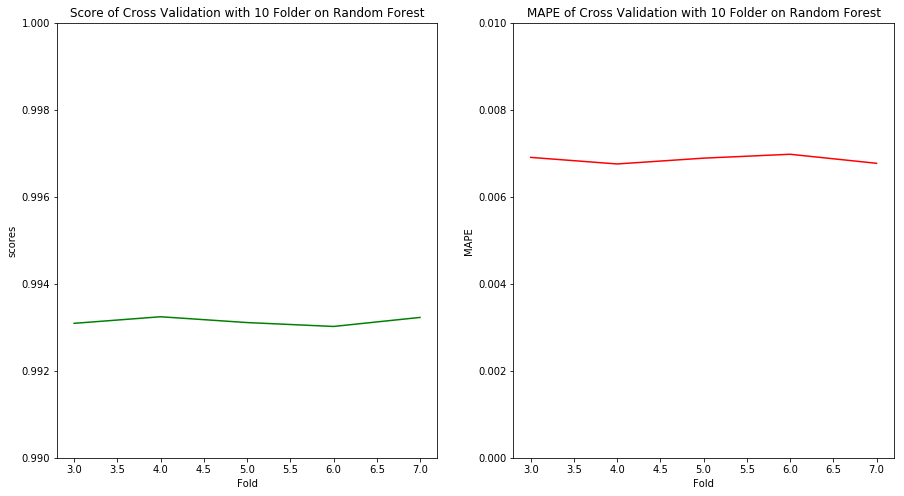

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax = ax.flatten()
ax[0].plot(range(1,8,1), scores, 'g-')
ax[0].set_ylim([0.99,1])
ax[0].set_ylabel("scores")
ax[0].set_xlabel("Fold")
ax[0].set_title("Score of Cross Validation with 10 Folder on Random Forest")
ax[1].plot(range(1,8,1), mape, 'r-')
ax[1].set_ylabel("MAPE")
ax[1].set_xlabel("Fold")
ax[1].set_ylim([0,0.01])
ax[1].set_title("MAPE of Cross Validation with 10 Folder on Random Forest")
plt.show()

In [43]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mape = MAPE(predictions, test_labels)
    accuracy = 100 - mape*100
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('MAPE = {:0.2f}%.'.format(mape*100))
    
    return accuracy

In [45]:
best_param_cv = {
    'bootstrap': True,
    'max_depth': 80,
    'max_features': 2,
    'min_samples_split': 8,
    'min_samples_leaf': 3,
    'n_estimators': 100
}
rf = RandomForestRegressor(**best_param_cv)
rf.fit(X_train, y_train)
evaluate(rf, X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Model Performance
Accuracy = 97.71%.
MAPE = 2.29%.


97.7135296184178